In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = 'lalonde.csv'
patients_df = pd.DataFrame.from_csv(path, sep=",")

In [61]:
# Cast values to numeric
patients_df.apply(pd.to_numeric, errors = 'coerce')
type(patients_df.iloc[1,1])

numpy.int64

In [151]:
# splits a dataframe on a two-categorical column by values
def split_in_two(df, column):
    first = df[df[column] == 0]
    second = df[df[column] == 1]
    return first, second

In [153]:
treated_df.tail(2)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW184,1,35,8,1,0,1,1,13732.07,17976.15,3786.628
NSW185,1,33,11,1,0,1,1,14660.71,25142.24,4181.942


In [154]:
ntreated_df.head(2)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
PSID1,0,30,12,0,0,1,0,20166.73,18347.23,25564.67
PSID2,0,26,12,0,0,1,0,25862.32,17806.55,25564.67


In [145]:
def get_min_max(df, first_col, last_col):
    values = df.loc[:, first_col:last_col]
    min_value = values.min().min()
    max_value = values.max().max()
    return min_value, max_value

In [147]:
min_re, max_re = get_min_max(patients_df, 're74', 're78')
max_re

60307.93

In [157]:
def get_column_serie(df, column):
    return df[[column]].values[:, 0]

In [167]:
def create_bins(min_val, max_val, interval):
    bins_ = []
    for i in range(int(min_val), int(max_val), interval):
        bins_.append(i)
    return bins_

In [168]:
cut_range = 2000
bins_ = create_bins(min_re, max_re, cut_range)

In [181]:
def make_comparative_histogram(df1, df2, column, bins_param, xlabel, legends):
    serie1 = get_column_serie(df1, column)
    serie2 = get_column_serie(df2, column)
    
    
    plt.hist([serie1, serie2], bins=bins_param,  edgecolor="k")
    plt.xlabel(xlabel)
    plt.legend(legends)
    plt.show()

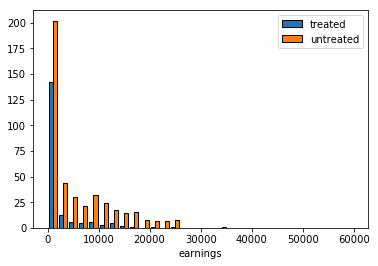

In [183]:
make_comparative_histogram(treated_df, ntreated_df, 're74', bins_, 'earnings', ['treated', 'untreated'])

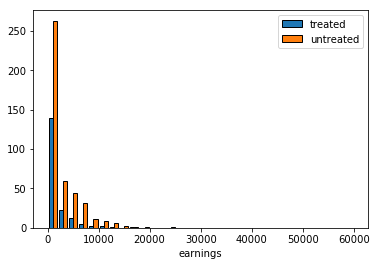

In [184]:
make_comparative_histogram(treated_df, ntreated_df, 're75', bins_, 'earnings', ['treated', 'untreated'])

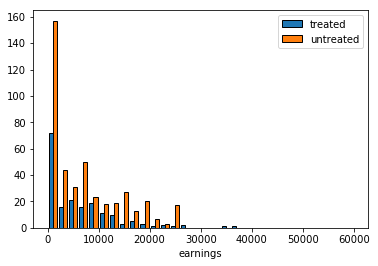

In [182]:
make_comparative_histogram(treated_df, ntreated_df, 're78', bins_, 'earnings', ['treated', 'untreated'])